# Lasso Regression 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# import sklearn row data 
from sklearn.datasets import fetch_california_housing

In [6]:
df = fetch_california_housing()

In [8]:
# load dataset in dataFrame

dataset = pd.DataFrame(df.data)

In [10]:
dataset.columns = df.feature_names

In [12]:
# Step 3 : Indepndent features x and Dependent Features y
x = dataset
y = df.target

In [14]:
# Step 4: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [16]:
# Step 5: Standardize the features
from sklearn.preprocessing import StandardScaler
# create sclaer object
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Now x_train and x_test are scaled and ready for model training!
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (16512, 8)
Testing data shape: (4128, 8)


In [22]:
# Now Using Lasso Regression Create and Train the model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [28]:
lasso = Lasso()
lasso

Lasso()

In [30]:
parameters = {'alpha':[1,2,3,4,5,12,10,7,20,30,45,90,100]}
lassocv = GridSearchCV(lasso,parameters, scoring = 'neg_mean_squared_error', cv = 10)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 12, 10, 7, 20, 30, 45, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [32]:
print(lassocv.best_params_)

{'alpha': 1}


In [34]:
print(lassocv.best_score_)

-1.3369033214482022


In [36]:
lasso_pred = lassocv.predict(X_test)

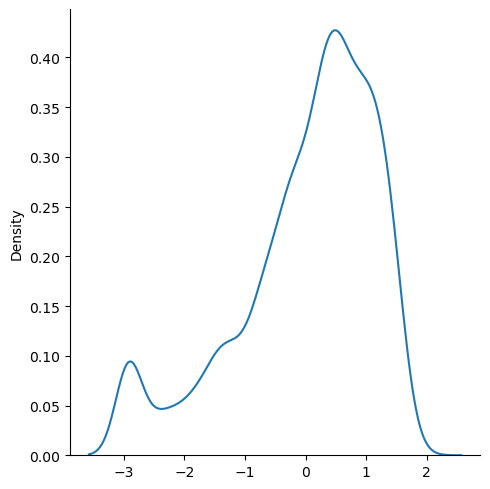

In [40]:
import seaborn as sns
sns.displot(lasso_pred - y_test, kind = 'kde')